In [12]:
!pip install seaborn


In [13]:
!pip install scikit-learn


In [17]:
pip install scikit-learn


  Using cached scikit_learn-1.6.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (31 kB)
  Using cached scipy-1.14.1-cp311-cp311-macosx_10_13_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-macosx_10_9_x86_64.whl (12.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp311-cp311-macosx_10_13_x86_64.whl (39.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Statistik Deskriptif:
{'Total Pelanggan': 3286, 'Rata-rata Pesanan': np.float64(2.4540474741326843), 'Total Pengeluaran': {'Mean': np.float64(346032.86670724285), 'Median': np.float64(198000.0), 'Min': np.int64(0), 'Max': np.int64(2840000)}, 'Distribusi Kota': {'Yogyakarta': 358, 'Surabaya': 345, 'Medan': 345, 'Jakarta': 337, 'Denpasar': 323, 'Palembang': 317, 'Semarang': 316, 'Makassar': 316, 'Bandung': 309, 'Kota Depok': 10, 'Kota Medan': 9, 'Kota Jakarta Pusat': 8, 'Kota Palembang': 7, 'Kabupaten Dairi': 7, 'Kota Jakarta Timur': 7, 'Kota Semarang': 7, 'Kabupaten Dharmasraya': 7, 'Kota Surabaya': 7, 'Kota Tangerang': 6, 'Kabupaten Lima Puluh Koto/Kota': 6, 'Kota Bandung': 6, 'Kabupaten Bekasi': 6, 'Kabupaten Kepulauan Mentawai': 6, 'Kabupaten Batu Bara': 6, 'Kabupaten Deli Serdang': 5, 'Kota Pekanbaru': 5, 'Kabupaten Sidoarjo': 5, 'Kota Bekasi': 5, 'Kabupaten Bogor': 5, 'Kabupaten Banyumas': 5, 'Kota Jakarta Selatan': 4, 'Kota Tangerang Selatan': 4, 'Kota Malang': 4, 'Kota Samarinda'

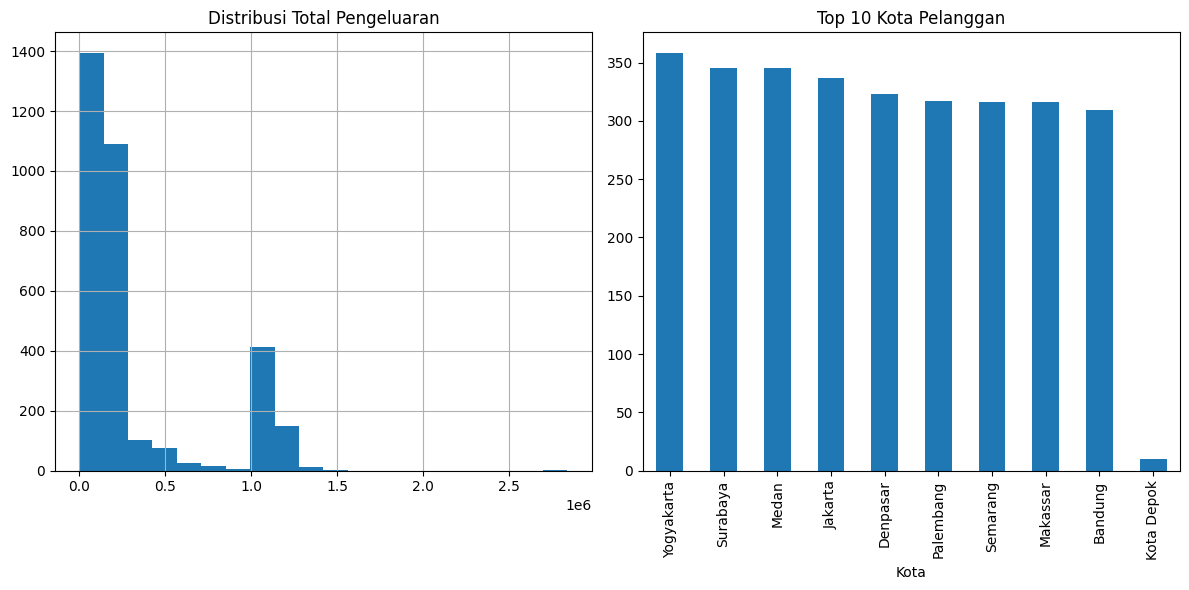


Klasifikasi Pelanggan RFM:
Segment
Hibernating    3271
Champion          0
Loyal             0
Potential         0
Name: count, dtype: int64

Proyeksi Penjualan:


ModuleNotFoundError: No module named 'sklearn'

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baca Dataset
df = pd.read_csv('Updated_Customer_Report_With_Abbreviations.csv')

class AnalisaCustomer:
    def __init__(self, dataframe):
        self.df = dataframe
        self.persiapan_data()

    def persiapan_data(self):
        # Pembersihan dan konversi tipe data
        self.df['Total Pengeluaran'] = pd.to_numeric(self.df['Total Pengeluaran'], errors='coerce')
        self.df['Pesanan'] = pd.to_numeric(self.df['Pesanan'], errors='coerce')
        self.df['Tanggal Registrasi'] = pd.to_datetime(self.df['Mendaftar'])

    def statistik_deskriptif(self):
        """Menghasilkan statistik deskriptif menyeluruh"""
        return {
            'Total Pelanggan': len(self.df),
            'Rata-rata Pesanan': self.df['Pesanan'].mean(),
            'Total Pengeluaran': {
                'Mean': self.df['Total Pengeluaran'].mean(),
                'Median': self.df['Total Pengeluaran'].median(),
                'Min': self.df['Total Pengeluaran'].min(),
                'Max': self.df['Total Pengeluaran'].max()
            },
            'Distribusi Kota': self.df['Kota'].value_counts().to_dict()
        }

    def visualisasi_pelanggan(self):
        """Membuat visualisasi untuk analisis pelanggan"""
        # Plot distribusi total pengeluaran
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        self.df['Total Pengeluaran'].hist(bins=20)
        plt.title('Distribusi Total Pengeluaran')

        # Plot distribusi kota top 10
        plt.subplot(1,2,2)
        self.df['Kota'].value_counts().head(10).plot(kind='bar')
        plt.title('Top 10 Kota Pelanggan')

        plt.tight_layout()
        plt.show()

## 2. Metode Segmentasi RFM (Recency, Frequency, Monetary)
class AnalisaRFM:
    def __init__(self, dataframe):
        self.df = dataframe
        self.persiapan_rfm()

    def persiapan_rfm(self):
        # Tanggal referensi terakhir
        tanggal_referensi = pd.to_datetime(self.df['Terakhir Aktif']).max()

        # Hitung RFM
        rfm = self.df.groupby('Email').agg({
            'Terakhir Aktif': lambda x: (tanggal_referensi - pd.to_datetime(x.max())).days,
            'Pesanan': 'count',
            'Total Pengeluaran': 'sum'
        })

        rfm.columns = ['Recency', 'Frequency', 'Monetary']

        # Scoring RFM
        rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
        rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
        rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

        # Normalisasi
        rfm['RFM_Score'] = rfm['R_rank'] + rfm['F_rank'] + rfm['M_rank']

        return rfm

    def klasifikasi_pelanggan(self):
        """Klasifikasi pelanggan berdasarkan RFM"""
        rfm = self.persiapan_rfm()

        # Segmentasi pelanggan
        rfm['Segment'] = pd.cut(
            rfm['RFM_Score'],
            bins=[0, 3, 6, 9, np.inf],
            labels=['Champion', 'Loyal', 'Potential', 'Hibernating']
        )

        return rfm['Segment'].value_counts()

## 3. Metode Prediksi Sederhana
class ModelPrediksi:
    def __init__(self, dataframe):
        self.df = dataframe

    def proyeksi_penjualan(self):
        """Proyeksi penjualan berdasarkan data historis"""
        # Agregasi penjualan bulanan
        self.df['Bulan'] = pd.to_datetime(self.df['Terakhir Aktif']).dt.to_period('M')
        penjualan_bulanan = self.df.groupby('Bulan')['Total Pengeluaran'].sum()

        # Regresi sederhana
        X = np.arange(len(penjualan_bulanan)).reshape(-1, 1)
        y = penjualan_bulanan.values

        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X, y)

        # Prediksi 3 bulan ke depan
        prediksi = model.predict(np.array([[len(penjualan_bulanan)],
                                          [len(penjualan_bulanan)+1],
                                          [len(penjualan_bulanan)+2]]))

        return {
            'Penjualan Historis': penjualan_bulanan,
            'Proyeksi Penjualan': prediksi
        }

# Eksekusi Analisis
def main():
    # Baca dataset
    df = pd.read_csv('Updated_Customer_Report_With_Abbreviations.csv')

    # 1. Statistik Deskriptif
    analisa_desc = AnalisaCustomer(df)
    print("Statistik Deskriptif:")
    print(analisa_desc.statistik_deskriptif())
    analisa_desc.visualisasi_pelanggan()

    # 2. Analisis RFM
    analisa_rfm = AnalisaRFM(df)
    print("\nKlasifikasi Pelanggan RFM:")
    print(analisa_rfm.klasifikasi_pelanggan())

    # 3. Proyeksi Penjualan
    model_prediksi = ModelPrediksi(df)
    print("\nProyeksi Penjualan:")
    proyeksi = model_prediksi.proyeksi_penjualan()
    print(proyeksi)

# Jalankan analisis
if __name__ == "__main__":
    main()


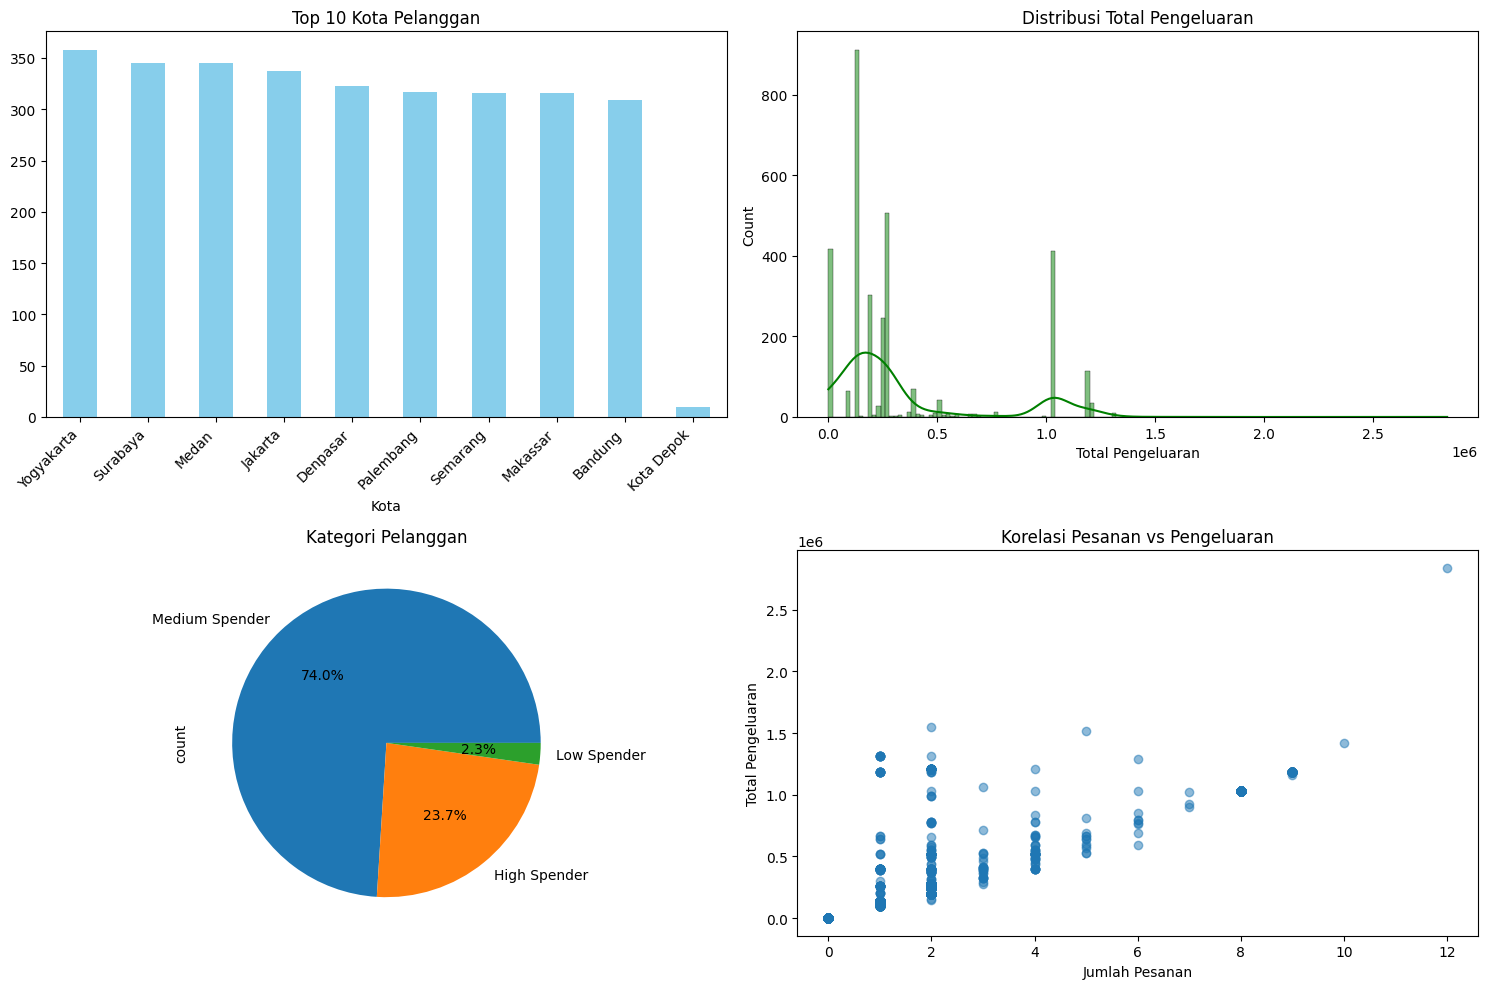

📊 Ringkasan Statistik Pelanggan:
Total Pelanggan: 3286
Rata-rata Pengeluaran: Rp 346,032.87
Rata-rata Pesanan: 2.45

🔍 Distribusi Kategori Pelanggan:
Total Pengeluaran
Medium Spender    0.740070
High Spender      0.237282
Low Spender       0.022648
Name: proportion, dtype: float64

💡 Rekomendasi Bisnis:


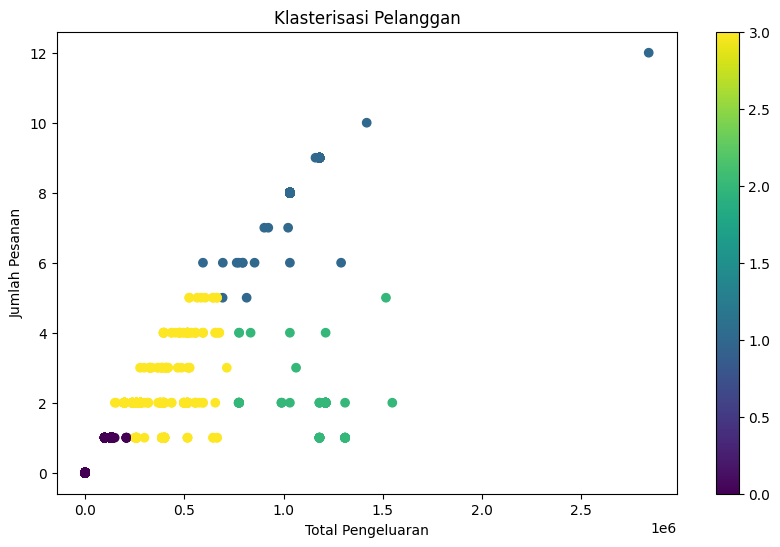

Strategi Per Klaster Pelanggan:
Klaster 0:
- Pengeluaran Rata-rata: Rp 91,359.54
- Pesanan Rata-rata: 0.70
Klaster 1:
- Pengeluaran Rata-rata: Rp 1,060,325.71
- Pesanan Rata-rata: 8.15
Klaster 2:
- Pengeluaran Rata-rata: Rp 1,150,532.47
- Pesanan Rata-rata: 1.92
Klaster 3:
- Pengeluaran Rata-rata: Rp 283,260.70
- Pesanan Rata-rata: 2.06
1. Fokus pada Medium Spender untuk program loyalitas
2. Kembangkan strategi retensi untuk pelanggan High Spender
3. Berikan insentif untuk meningkatkan frekuensi pembelian Low Spender
4. Lakukan targeting iklan berdasarkan karakteristik klaster


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class AnalisisPelanggan:
    def __init__(self, file_path):
        # 1. METODOLOGI: Persiapan Data
        self.df = pd.read_csv(file_path)
        self.persiapan_data()

    def persiapan_data(self):
        """Metodologi Pembersihan & Transformasi Data"""
        # Konversi tipe data
        kolom_numerik = ['Total Pengeluaran', 'Pesanan']
        for kolom in kolom_numerik:
            self.df[kolom] = pd.to_numeric(self.df[kolom], errors='coerce')

        # Hapus data duplikat
        self.df.drop_duplicates(inplace=True)

        # Tangani missing values
        self.df.dropna(subset=kolom_numerik, inplace=True)

    def visualisasi_demografis(self):
        """Visualisasi Profil Demografis Pelanggan"""
        plt.figure(figsize=(15,10))

        # Subplot 1: Distribusi Kota
        plt.subplot(2,2,1)
        top_kota = self.df['Kota'].value_counts().head(10)
        top_kota.plot(kind='bar', color='skyblue')
        plt.title('Top 10 Kota Pelanggan')
        plt.xticks(rotation=45, ha='right')

        # Subplot 2: Distribusi Pengeluaran
        plt.subplot(2,2,2)
        sns.histplot(self.df['Total Pengeluaran'], kde=True, color='green')
        plt.title('Distribusi Total Pengeluaran')

        # Subplot 3: Pie Chart Kategori Pelanggan
        plt.subplot(2,2,3)
        kategori = pd.cut(self.df['Total Pengeluaran'],
                          bins=[0, 100000, 500000, np.inf],
                          labels=['Low Spender', 'Medium Spender', 'High Spender'])
        kategori.value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Kategori Pelanggan')

        # Subplot 4: Scatter Plot Pesanan vs Pengeluaran
        plt.subplot(2,2,4)
        plt.scatter(self.df['Pesanan'], self.df['Total Pengeluaran'], alpha=0.5)
        plt.title('Korelasi Pesanan vs Pengeluaran')
        plt.xlabel('Jumlah Pesanan')
        plt.ylabel('Total Pengeluaran')

        plt.tight_layout()
        plt.show()

    def analisis_klaster(self):
        """Metodologi Klasterisasi Pelanggan"""
        # Persiapan fitur untuk klasterisasi
        fitur = ['Total Pengeluaran', 'Pesanan']
        X = self.df[fitur]

        # Standarisasi fitur
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Klasterisasi K-Means
        kmeans = KMeans(n_clusters=4, random_state=42)
        self.df['Klaster'] = kmeans.fit_predict(X_scaled)

        # Visualisasi Klaster
        plt.figure(figsize=(10,6))
        scatter = plt.scatter(
            self.df['Total Pengeluaran'],
            self.df['Pesanan'],
            c=self.df['Klaster'],
            cmap='viridis'
        )
        plt.title('Klasterisasi Pelanggan')
        plt.xlabel('Total Pengeluaran')
        plt.ylabel('Jumlah Pesanan')
        plt.colorbar(scatter)
        plt.show()

        # Karakteristik Klaster
        return self.df.groupby('Klaster')[fitur].mean()

    def interpretasi_hasil(self):
        """Interpretasi Komprehensif"""
        # Ringkasan Statistik
        print("📊 Ringkasan Statistik Pelanggan:")
        print(f"Total Pelanggan: {len(self.df)}")
        print(f"Rata-rata Pengeluaran: Rp {self.df['Total Pengeluaran'].mean():,.2f}")
        print(f"Rata-rata Pesanan: {self.df['Pesanan'].mean():.2f}")

        # Distribusi Pelanggan
        kategori = pd.cut(self.df['Total Pengeluaran'],
                          bins=[0, 100000, 500000, np.inf],
                          labels=['Low Spender', 'Medium Spender', 'High Spender'])
        distribusi = kategori.value_counts(normalize=True)
        print("\n🔍 Distribusi Kategori Pelanggan:")
        print(distribusi)

    def rekomendasi_bisnis(self):
        """Rekomendasi Strategis"""
        print("\n💡 Rekomendasi Bisnis:")

        # Rekomendasi Berdasarkan Klaster
        klaster = self.analisis_klaster()
        print("Strategi Per Klaster Pelanggan:")
        for idx, row in klaster.iterrows():
            print(f"Klaster {idx}:")
            print(f"- Pengeluaran Rata-rata: Rp {row['Total Pengeluaran']:,.2f}")
            print(f"- Pesanan Rata-rata: {row['Pesanan']:.2f}")

        # Strategi Umum
        rekomendasi = [
            "1. Fokus pada Medium Spender untuk program loyalitas",
            "2. Kembangkan strategi retensi untuk pelanggan High Spender",
            "3. Berikan insentif untuk meningkatkan frekuensi pembelian Low Spender",
            "4. Lakukan targeting iklan berdasarkan karakteristik klaster"
        ]

        for r in rekomendasi:
            print(r)

# Eksekusi Analisis
def main():
    analisis = AnalisisPelanggan('Updated_Customer_Report_With_Abbreviations.csv')

    # Jalankan Metodologi Analisis
    analisis.visualisasi_demografis()
    analisis.interpretasi_hasil()
    analisis.rekomendasi_bisnis()

if __name__ == "__main__":
    main()


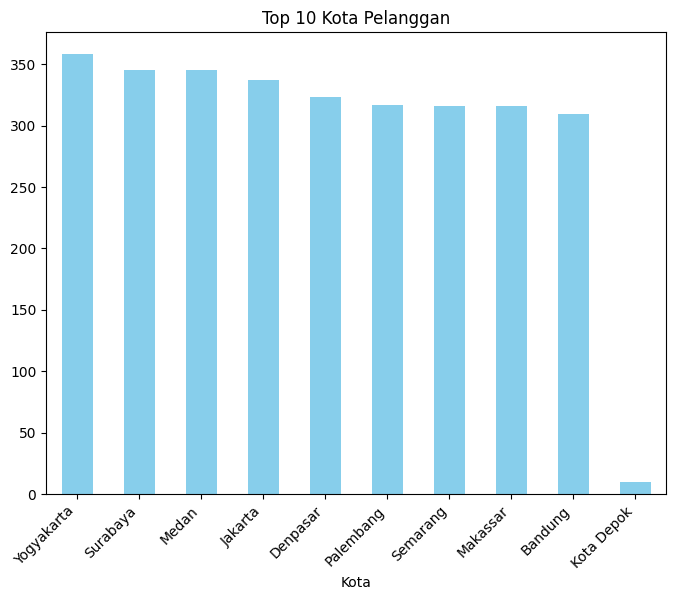

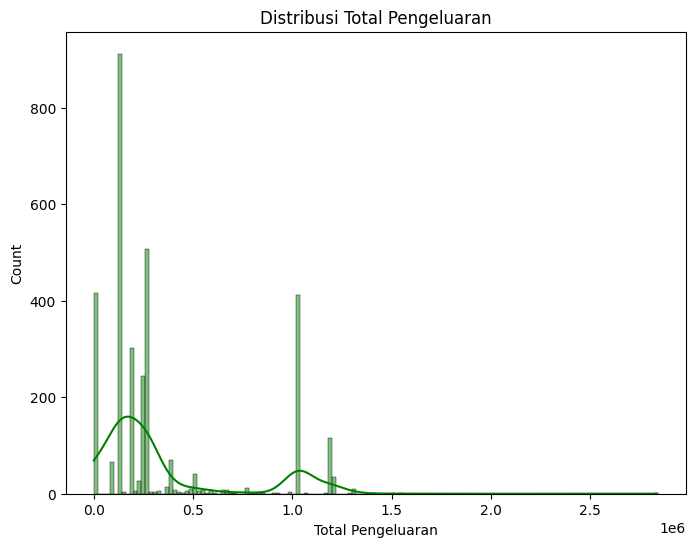

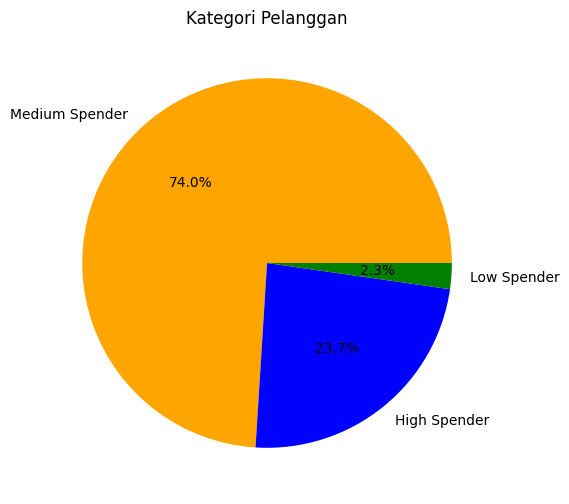

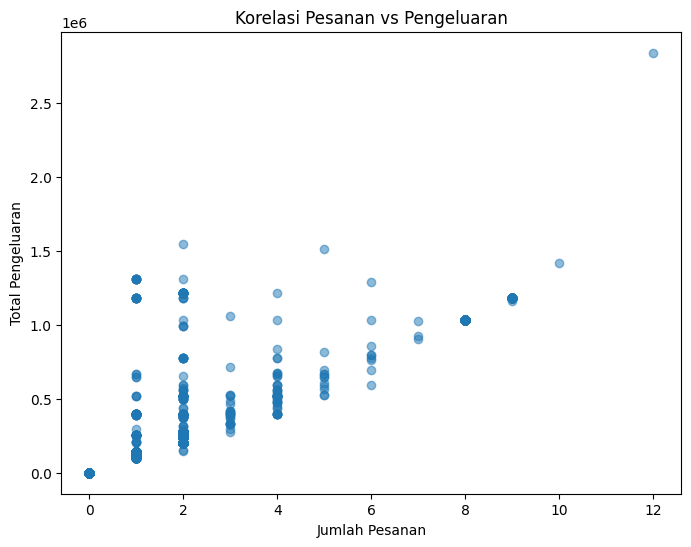


📊 Ringkasan Statistik Pelanggan:
Total Pelanggan: 3286
Rata-rata Pengeluaran: Rp 346,032.87
Rata-rata Pesanan: 2.45

🔍 Distribusi Kategori Pelanggan:
Total Pengeluaran
Medium Spender    0.740070
High Spender      0.237282
Low Spender       0.022648
Name: proportion, dtype: float64

💡 Rekomendasi Bisnis:


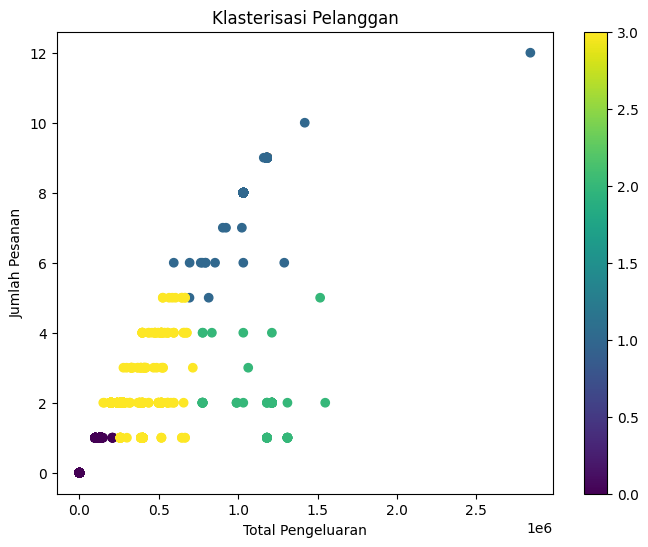

Klaster 0:
- Pengeluaran Rata-rata: Rp 91,359.54
- Pesanan Rata-rata: 0.70
Klaster 1:
- Pengeluaran Rata-rata: Rp 1,060,325.71
- Pesanan Rata-rata: 8.15
Klaster 2:
- Pengeluaran Rata-rata: Rp 1,150,532.47
- Pesanan Rata-rata: 1.92
Klaster 3:
- Pengeluaran Rata-rata: Rp 283,260.70
- Pesanan Rata-rata: 2.06
1. Fokus pada Medium Spender untuk program loyalitas.
2. Berikan diskon dan reward khusus untuk High Spender.
3. Tingkatkan jumlah transaksi untuk Low Spender melalui promo menarik.
4. Optimalisasi strategi iklan berdasarkan klaster pelanggan.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class AnalisisPelanggan:
    def __init__(self, file_path):
        """Inisialisasi DataFrame dan Persiapan Data"""
        self.df = pd.read_csv(file_path)
        self.persiapan_data()

    def persiapan_data(self):
        """Pembersihan & Transformasi Data"""
        kolom_numerik = ['Total Pengeluaran', 'Pesanan']
        for kolom in kolom_numerik:
            self.df[kolom] = pd.to_numeric(self.df[kolom], errors='coerce')
        self.df.drop_duplicates(inplace=True)
        self.df.dropna(subset=kolom_numerik, inplace=True)

    # === VISUALISASI TERPISAH ===
    def plot_top_kota(self):
        """Visualisasi Top 10 Kota Pelanggan"""
        plt.figure(figsize=(8,6))
        top_kota = self.df['Kota'].value_counts().head(10)
        top_kota.plot(kind='bar', color='skyblue')
        plt.title('Top 10 Kota Pelanggan')
        plt.xticks(rotation=45, ha='right')
        plt.show()

    def plot_distribusi_pengeluaran(self):
        """Visualisasi Distribusi Total Pengeluaran"""
        plt.figure(figsize=(8,6))
        sns.histplot(self.df['Total Pengeluaran'], kde=True, color='green')
        plt.title('Distribusi Total Pengeluaran')
        plt.xlabel('Total Pengeluaran')
        plt.show()

    def plot_kategori_pelanggan(self):
        """Pie Chart Kategori Pelanggan"""
        kategori = pd.cut(self.df['Total Pengeluaran'],
                          bins=[0, 100000, 500000, np.inf],
                          labels=['Low Spender', 'Medium Spender', 'High Spender'])
        plt.figure(figsize=(8,6))
        kategori.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'blue', 'green'])
        plt.title('Kategori Pelanggan')
        plt.ylabel('')
        plt.show()

    def plot_korelasi_pesanan_pengeluaran(self):
        """Scatter Plot Pesanan vs Total Pengeluaran"""
        plt.figure(figsize=(8,6))
        plt.scatter(self.df['Pesanan'], self.df['Total Pengeluaran'], alpha=0.5)
        plt.title('Korelasi Pesanan vs Pengeluaran')
        plt.xlabel('Jumlah Pesanan')
        plt.ylabel('Total Pengeluaran')
        plt.show()

    # === ANALISIS KLASTER DAN REKOMENDASI ===
    def analisis_klaster(self):
        """Klasterisasi Pelanggan menggunakan K-Means"""
        fitur = ['Total Pengeluaran', 'Pesanan']
        X = self.df[fitur]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        kmeans = KMeans(n_clusters=4, random_state=42)
        self.df['Klaster'] = kmeans.fit_predict(X_scaled)

        plt.figure(figsize=(8,6))
        scatter = plt.scatter(self.df['Total Pengeluaran'], 
                              self.df['Pesanan'], 
                              c=self.df['Klaster'], cmap='viridis')
        plt.title('Klasterisasi Pelanggan')
        plt.xlabel('Total Pengeluaran')
        plt.ylabel('Jumlah Pesanan')
        plt.colorbar(scatter)
        plt.show()

        return self.df.groupby('Klaster')[fitur].mean()

    def interpretasi_hasil(self):
        """Ringkasan Data Pelanggan"""
        print("\n📊 Ringkasan Statistik Pelanggan:")
        print(f"Total Pelanggan: {len(self.df)}")
        print(f"Rata-rata Pengeluaran: Rp {self.df['Total Pengeluaran'].mean():,.2f}")
        print(f"Rata-rata Pesanan: {self.df['Pesanan'].mean():.2f}")
        
        kategori = pd.cut(self.df['Total Pengeluaran'],
                          bins=[0, 100000, 500000, np.inf],
                          labels=['Low Spender', 'Medium Spender', 'High Spender'])
        distribusi = kategori.value_counts(normalize=True)
        print("\n🔍 Distribusi Kategori Pelanggan:")
        print(distribusi)

    def rekomendasi_bisnis(self):
        """Rekomendasi Strategis Berdasarkan Klaster"""
        print("\n💡 Rekomendasi Bisnis:")
        klaster = self.analisis_klaster()
        for idx, row in klaster.iterrows():
            print(f"Klaster {idx}:")
            print(f"- Pengeluaran Rata-rata: Rp {row['Total Pengeluaran']:,.2f}")
            print(f"- Pesanan Rata-rata: {row['Pesanan']:.2f}")

        rekomendasi = [
            "1. Fokus pada Medium Spender untuk program loyalitas.",
            "2. Berikan diskon dan reward khusus untuk High Spender.",
            "3. Tingkatkan jumlah transaksi untuk Low Spender melalui promo menarik.",
            "4. Optimalisasi strategi iklan berdasarkan klaster pelanggan."
        ]
        for r in rekomendasi:
            print(r)

# === EKSEKUSI PROGRAM ===
def main():
    file_path = 'Updated_Customer_Report_With_Abbreviations.csv'
    analisis = AnalisisPelanggan(file_path)

    # Tampilkan Visualisasi
    analisis.plot_top_kota()
    analisis.plot_distribusi_pengeluaran()
    analisis.plot_kategori_pelanggan()
    analisis.plot_korelasi_pesanan_pengeluaran()

    # Analisis & Rekomendasi
    analisis.interpretasi_hasil()
    analisis.rekomendasi_bisnis()

if __name__ == "__main__":
    main()


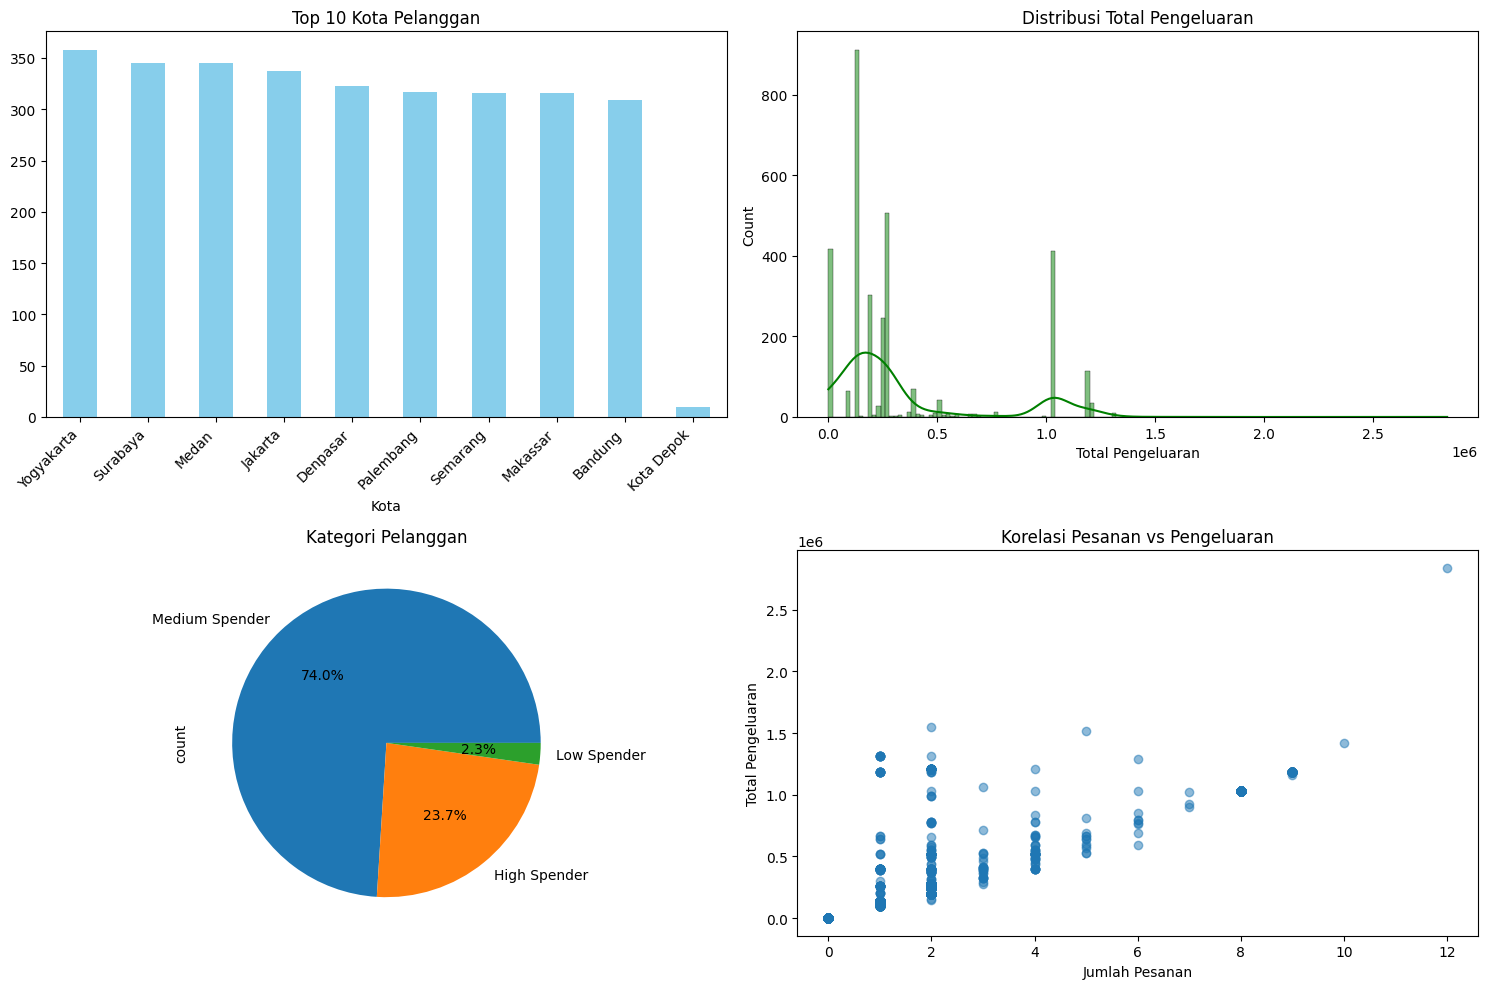

📊 Ringkasan Statistik Pelanggan:
Total Pelanggan: 3286
Rata-rata Pengeluaran: Rp 346,032.87
Rata-rata Pesanan: 2.45

🔍 Distribusi Kategori Pelanggan:
Total Pengeluaran
Medium Spender    0.740070
High Spender      0.237282
Low Spender       0.022648
Name: proportion, dtype: float64

💡 Rekomendasi Bisnis:


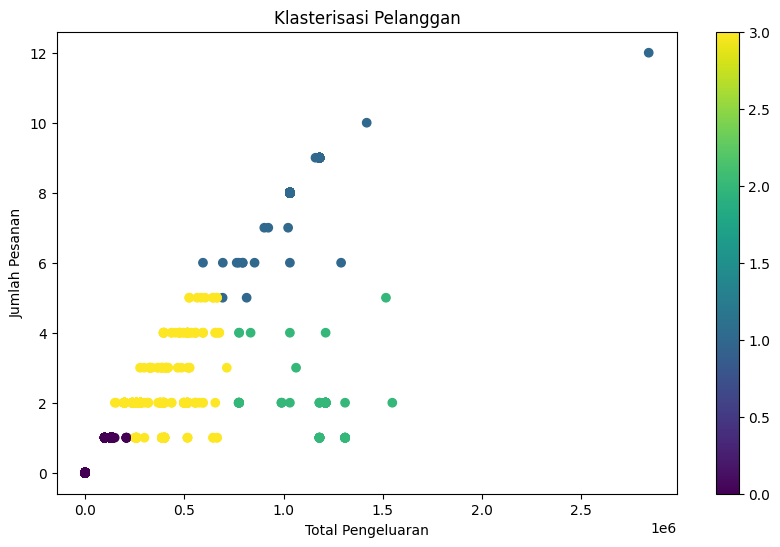

Strategi Per Klaster Pelanggan:
Klaster 0:
- Pengeluaran Rata-rata: Rp 91,359.54
- Pesanan Rata-rata: 0.70
Klaster 1:
- Pengeluaran Rata-rata: Rp 1,060,325.71
- Pesanan Rata-rata: 8.15
Klaster 2:
- Pengeluaran Rata-rata: Rp 1,150,532.47
- Pesanan Rata-rata: 1.92
Klaster 3:
- Pengeluaran Rata-rata: Rp 283,260.70
- Pesanan Rata-rata: 2.06
1. Fokus pada Medium Spender untuk program loyalitas
2. Kembangkan strategi retensi untuk pelanggan High Spender
3. Berikan insentif untuk meningkatkan frekuensi pembelian Low Spender
4. Lakukan targeting iklan berdasarkan karakteristik klaster


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class AnalisisPelanggan:
    def __init__(self, file_path):
        # 1. METODOLOGI: Persiapan Data
        self.df = pd.read_csv(file_path)
        self.persiapan_data()

    def persiapan_data(self):
        """Metodologi Pembersihan & Transformasi Data"""
        # Konversi tipe data
        kolom_numerik = ['Total Pengeluaran', 'Pesanan']
        for kolom in kolom_numerik:
            self.df[kolom] = pd.to_numeric(self.df[kolom], errors='coerce')

        # Hapus data duplikat
        self.df.drop_duplicates(inplace=True)

        # Tangani missing values
        self.df.dropna(subset=kolom_numerik, inplace=True)

    def visualisasi_demografis(self):
        """Visualisasi Profil Demografis Pelanggan"""
        plt.figure(figsize=(15,10))

        # Subplot 1: Distribusi Kota
        plt.subplot(2,2,1)
        top_kota = self.df['Kota'].value_counts().head(10)
        top_kota.plot(kind='bar', color='skyblue')
        plt.title('Top 10 Kota Pelanggan')
        plt.xticks(rotation=45, ha='right')

        # Subplot 2: Distribusi Pengeluaran
        plt.subplot(2,2,2)
        sns.histplot(self.df['Total Pengeluaran'], kde=True, color='green')
        plt.title('Distribusi Total Pengeluaran')

        # Subplot 3: Pie Chart Kategori Pelanggan
        plt.subplot(2,2,3)
        kategori = pd.cut(self.df['Total Pengeluaran'],
                          bins=[0, 100000, 500000, np.inf],
                          labels=['Low Spender', 'Medium Spender', 'High Spender'])
        kategori.value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Kategori Pelanggan')

        # Subplot 4: Scatter Plot Pesanan vs Pengeluaran
        plt.subplot(2,2,4)
        plt.scatter(self.df['Pesanan'], self.df['Total Pengeluaran'], alpha=0.5)
        plt.title('Korelasi Pesanan vs Pengeluaran')
        plt.xlabel('Jumlah Pesanan')
        plt.ylabel('Total Pengeluaran')

        plt.tight_layout()
        plt.show()

    def analisis_klaster(self):
        """Metodologi Klasterisasi Pelanggan"""
        # Persiapan fitur untuk klasterisasi
        fitur = ['Total Pengeluaran', 'Pesanan']
        X = self.df[fitur]

        # Standarisasi fitur
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Klasterisasi K-Means
        kmeans = KMeans(n_clusters=4, random_state=42)
        self.df['Klaster'] = kmeans.fit_predict(X_scaled)

        # Visualisasi Klaster
        plt.figure(figsize=(10,6))
        scatter = plt.scatter(
            self.df['Total Pengeluaran'],
            self.df['Pesanan'],
            c=self.df['Klaster'],
            cmap='viridis'
        )
        plt.title('Klasterisasi Pelanggan')
        plt.xlabel('Total Pengeluaran')
        plt.ylabel('Jumlah Pesanan')
        plt.colorbar(scatter)
        plt.show()

        # Karakteristik Klaster
        return self.df.groupby('Klaster')[fitur].mean()

    def interpretasi_hasil(self):
        """Interpretasi Komprehensif"""
        # Ringkasan Statistik
        print("📊 Ringkasan Statistik Pelanggan:")
        print(f"Total Pelanggan: {len(self.df)}")
        print(f"Rata-rata Pengeluaran: Rp {self.df['Total Pengeluaran'].mean():,.2f}")
        print(f"Rata-rata Pesanan: {self.df['Pesanan'].mean():.2f}")

        # Distribusi Pelanggan
        kategori = pd.cut(self.df['Total Pengeluaran'],
                          bins=[0, 100000, 500000, np.inf],
                          labels=['Low Spender', 'Medium Spender', 'High Spender'])
        distribusi = kategori.value_counts(normalize=True)
        print("\n🔍 Distribusi Kategori Pelanggan:")
        print(distribusi)

    def rekomendasi_bisnis(self):
        """Rekomendasi Strategis"""
        print("\n💡 Rekomendasi Bisnis:")

        # Rekomendasi Berdasarkan Klaster
        klaster = self.analisis_klaster()
        print("Strategi Per Klaster Pelanggan:")
        for idx, row in klaster.iterrows():
            print(f"Klaster {idx}:")
            print(f"- Pengeluaran Rata-rata: Rp {row['Total Pengeluaran']:,.2f}")
            print(f"- Pesanan Rata-rata: {row['Pesanan']:.2f}")

        # Strategi Umum
        rekomendasi = [
            "1. Fokus pada Medium Spender untuk program loyalitas",
            "2. Kembangkan strategi retensi untuk pelanggan High Spender",
            "3. Berikan insentif untuk meningkatkan frekuensi pembelian Low Spender",
            "4. Lakukan targeting iklan berdasarkan karakteristik klaster"
        ]

        for r in rekomendasi:
            print(r)

# Eksekusi Analisis
def main():
    analisis = AnalisisPelanggan('Updated_Customer_Report_With_Abbreviations.csv')

    # Jalankan Metodologi Analisis
    analisis.visualisasi_demografis()
    analisis.interpretasi_hasil()
    analisis.rekomendasi_bisnis()

if __name__ == "__main__":
    main()


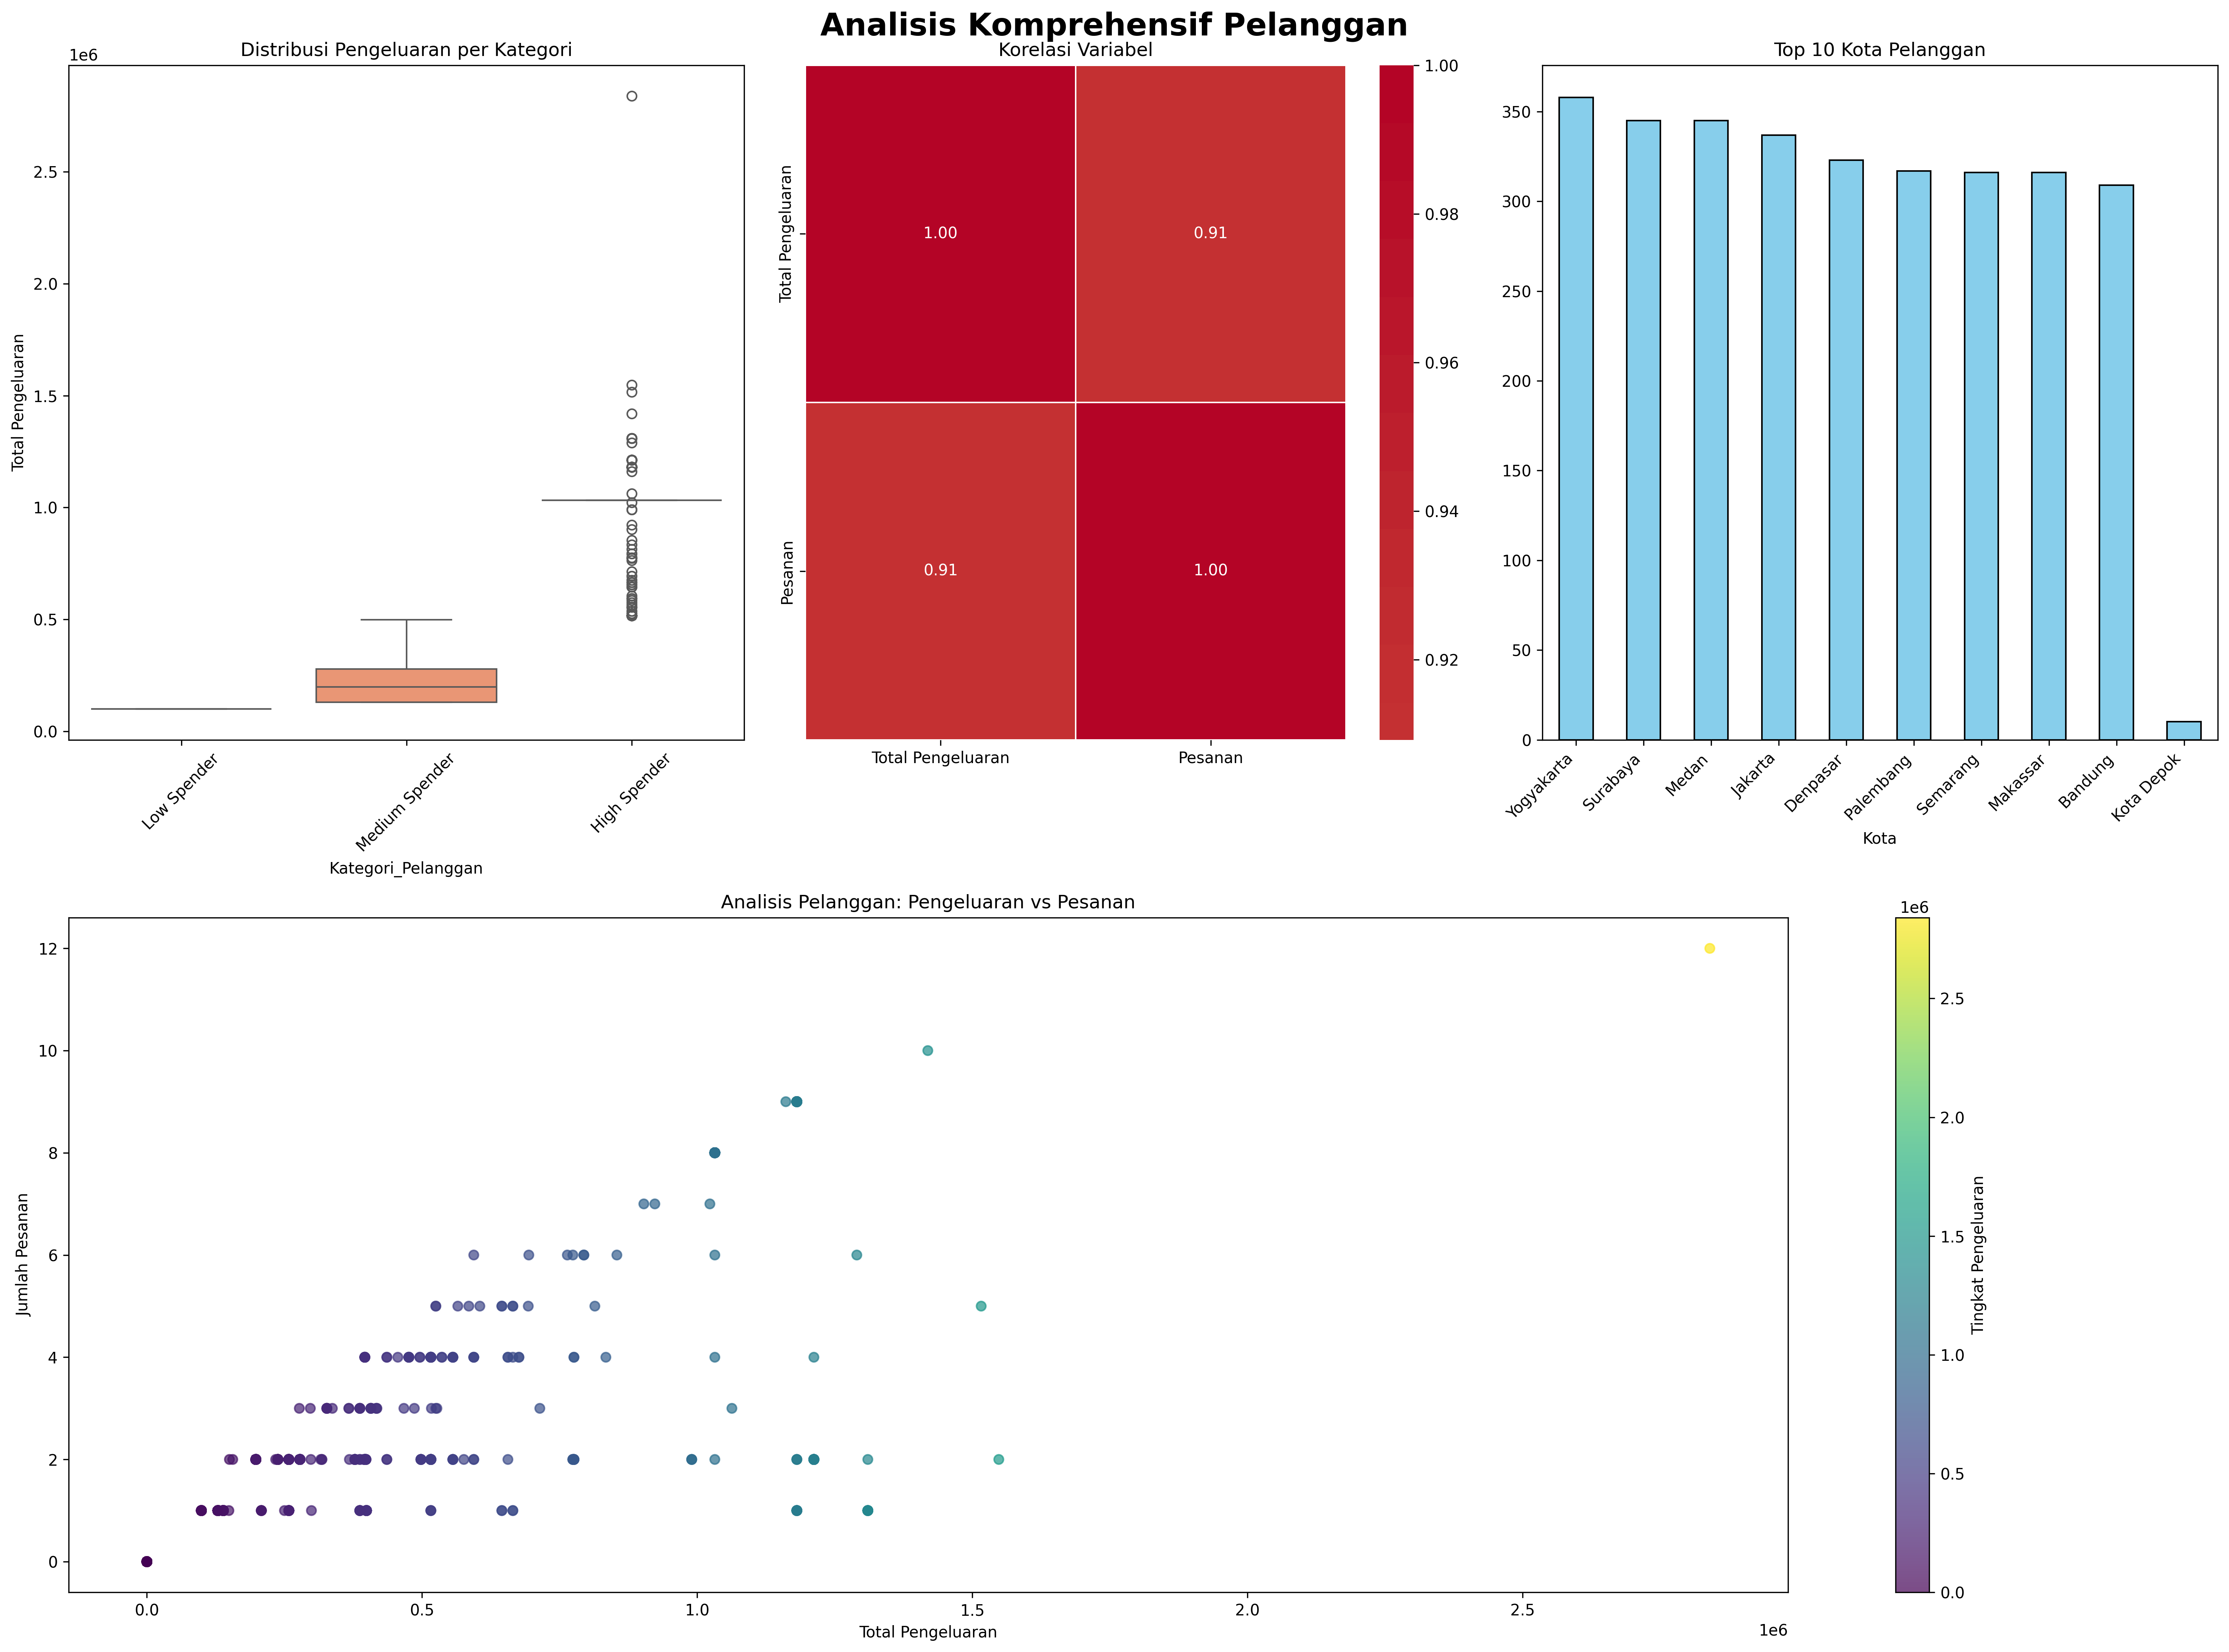


Hasil Klasterisasi:
        Total Pengeluaran         Pesanan      
                     mean count      mean count
Klaster                                        
0            9.135954e+04  1399  0.702645  1399
1            1.060326e+06   525  8.154286   525
2            1.150532e+06    77  1.922078    77
3            2.832607e+05  1285  2.063813  1285


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

class AnalisisPelangganLanjutan:
    def __init__(self, file_path=None):
        """
        Inisialisasi objek analisis pelanggan.

        Parameters:
        -----------
        file_path : str, optional
            Path menuju file CSV yang berisi data pelanggan
        """
        # Nonaktifkan warning
        warnings.filterwarnings('ignore')

        # Inisialisasi dataframe
        self.df = None

        # Muat data jika path disediakan
        if file_path:
            self.muat_data(file_path)

    def muat_data(self, file_path):
        """
        Memuat dan mempersiapkan data dari file CSV.

        Parameters:
        -----------
        file_path : str
            Path file CSV
        """
        try:
            # Baca dataset
            self.df = pd.read_csv(file_path)

            # Validasi kolom
            kolom_wajib = ['Total Pengeluaran', 'Pesanan', 'Kota']
            for kolom in kolom_wajib:
                if kolom not in self.df.columns:
                    raise ValueError(f"Kolom {kolom} tidak ditemukan")

            # Persiapan data
            self._persiapan_data()

        except FileNotFoundError:
            print(f"Error: File {file_path} tidak ditemukan!")
            raise
        except pd.errors.EmptyDataError:
            print("Error: File kosong!")
            raise
        except Exception as e:
            print(f"Error memuat data: {e}")
            raise

    def _persiapan_data(self):
        """
        Metode internal untuk pembersihan dan transformasi data.
        """
        try:
            # Konversi tipe data
            kolom_numerik = ['Total Pengeluaran', 'Pesanan']
            for kolom in kolom_numerik:
                self.df[kolom] = pd.to_numeric(self.df[kolom], errors='coerce')

            # Hapus duplikat dan missing values
            self.df.drop_duplicates(inplace=True)
            self.df.dropna(subset=kolom_numerik, inplace=True)

            # Tambahkan kolom kategorisasi
            self.df['Kategori_Pelanggan'] = pd.cut(
                self.df['Total Pengeluaran'],
                bins=[0, 100000, 500000, np.inf],
                labels=['Low Spender', 'Medium Spender', 'High Spender']
            )

        except Exception as e:
            print(f"Error dalam persiapan data: {e}")
            raise

    def visualisasi_lanjutan(self):
        """
        Menghasilkan visualisasi multidimensi dengan desain modern.
        """
        # Pastikan data sudah dimuat
        if self.df is None:
            print("Data belum dimuat. Gunakan metode muat_data() terlebih dahulu.")
            return

        # Atur figure
        plt.figure(figsize=(20,15), dpi=300, facecolor='white')
        plt.suptitle('Analisis Komprehensif Pelanggan', fontsize=20, fontweight='bold')

        # Grid Layout
        gs = plt.GridSpec(2, 3, figure=plt.gcf())

        # 1. Distribusi Pengeluaran
        plt.subplot(gs[0, 0])
        sns.boxplot(
            x='Kategori_Pelanggan',
            y='Total Pengeluaran',
            data=self.df,
            palette='Set2'
        )
        plt.title('Distribusi Pengeluaran per Kategori', fontsize=12)
        plt.xticks(rotation=45)

        # 2. Peta Panas Korelasi
        plt.subplot(gs[0, 1])
        kolom_numerik = ['Total Pengeluaran', 'Pesanan']
        korelasi = self.df[kolom_numerik].corr()
        sns.heatmap(
            korelasi,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f",
            center=0
        )
        plt.title('Korelasi Variabel', fontsize=12)

        # 3. Top 10 Kota Pelanggan
        plt.subplot(gs[0, 2])
        top_kota = self.df['Kota'].value_counts().head(10)
        top_kota.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Top 10 Kota Pelanggan', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # 4. Scatter Plot dengan warna gradien
        plt.subplot(gs[1, :])
        scatter = plt.scatter(
            self.df['Total Pengeluaran'],
            self.df['Pesanan'],
            c=self.df['Total Pengeluaran'],
            cmap='viridis',
            alpha=0.7
        )
        plt.colorbar(scatter, label='Tingkat Pengeluaran')
        plt.title('Analisis Pelanggan: Pengeluaran vs Pesanan', fontsize=12)
        plt.xlabel('Total Pengeluaran')
        plt.ylabel('Jumlah Pesanan')

        plt.tight_layout()
        plt.show()

    def klasterisasi_pelanggan(self):
        """
        Metode klasterisasi pelanggan menggunakan K-Means.
        """
        # Pastikan data sudah dimuat
        if self.df is None:
            print("Data belum dimuat. Gunakan metode muat_data() terlebih dahulu.")
            return None

        try:
            # Persiapan fitur
            fitur = ['Total Pengeluaran', 'Pesanan']
            X = self.df[fitur]

            # Standarisasi
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            # Klasterisasi
            kmeans = KMeans(n_clusters=4, random_state=42)
            self.df['Klaster'] = kmeans.fit_predict(X_scaled)

            # Analisis klaster
            return self.df.groupby('Klaster')[fitur].agg(['mean', 'count'])

        except Exception as e:
            print(f"Error dalam klasterisasi: {e}")
            return None

def main():
    """
    Fungsi utama untuk menjalankan analisis pelanggan.
    """
    try:
        # Inisialisasi analisis
        analisis = AnalisisPelangganLanjutan()

        # Muat data
        analisis.muat_data('Updated_Customer_Report_With_Abbreviations.csv')

        # Jalankan visualisasi
        analisis.visualisasi_lanjutan()

        # Lakukan klasterisasi
        klaster_hasil = analisis.klasterisasi_pelanggan()
        if klaster_hasil is not None:
            print("\nHasil Klasterisasi:")
            print(klaster_hasil)

    except FileNotFoundError:
        print("File CSV tidak ditemukan. Pastikan path file benar.")
    except pd.errors.EmptyDataError:
        print("File CSV kosong.")
    except Exception as e:
        print(f"Error dalam eksekusi analisis: {e}")

if __name__ == "__main__":
    main()


In [9]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 616.8 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.3
    Uninstalling pip-24.3:
      Successfully uninstalled pip-24.3


In [10]:
pip install pandas

  Using cached pandas-2.2.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (62 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_10_9_x86_64.whl (12.6 MB)
Using cached numpy-2.2.0-cp311-cp311-macosx_10_9_x86_64.whl (21.2 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install matplotlib

In [15]:
pip install matplotlib seaborn pandas numpy

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.4 MB/s eta 0:00:00a 0:00:010m
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp311-cp311-macosx_10_9_x86_64.whl (269 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.4 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp311-cp311-macosx_10_9_x86_64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.8 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To

In [8]:
df = pd.read_csv('Updated_Customer_Report_With_Abbreviations.csv')  # Sesuaikan dengan nama file


               ï»¿Nama           Nama pengguna       Terakhir Aktif  \
0    Khansa Kamilah .N         khansaisdrawing  2024-08-18 00:00:00   
1  Aftin Adinda Putri   aftinadinda3@gmail.com  2024-08-17 00:00:00   
2          Maria Ulfa      ulfa24434@gmail.com  2024-08-17 00:00:00   
3             Ismaya .                ismaya..  2024-08-16 00:00:00   
4           Ines Inera              Ines-Inera  2024-08-15 03:32:57   

             Mendaftar                     Email  Pesanan  Total Pengeluaran  \
0  2024-07-06 11:03:54  khansakn200910@gmail.com        1             129000   
1  2023-06-30 17:47:44    aftinadinda3@gmail.com        1             645000   
2  2024-03-01 08:17:38       ulfa24434@gmail.com        1             399000   
3  2021-09-18 11:43:21      mayafakar7@gmail.com        6             694000   
4  2022-02-09 17:53:23        nesinera@gmail.com        3             277000   

             AOV Negara/Wilayah             Kota Wilayah Kode Pos  
0  129000.000000        

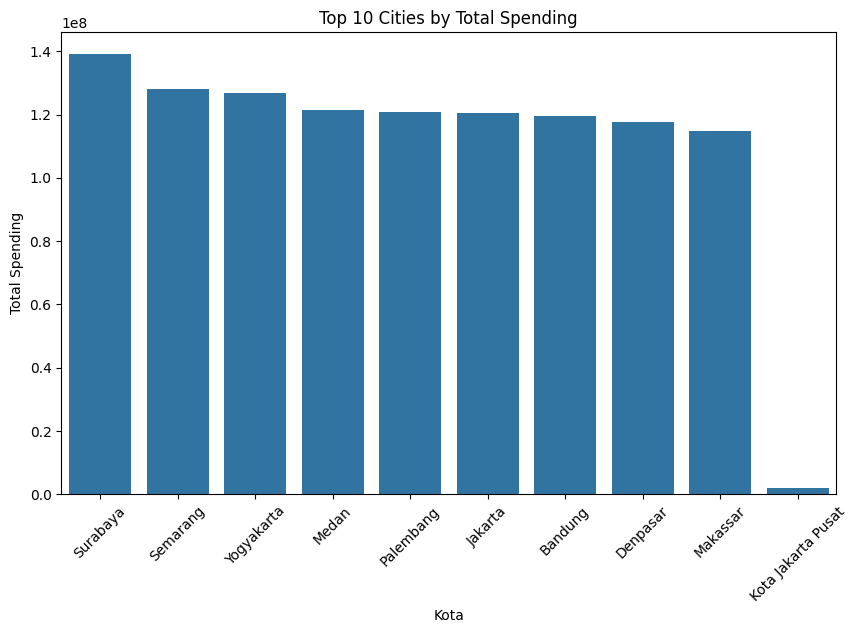

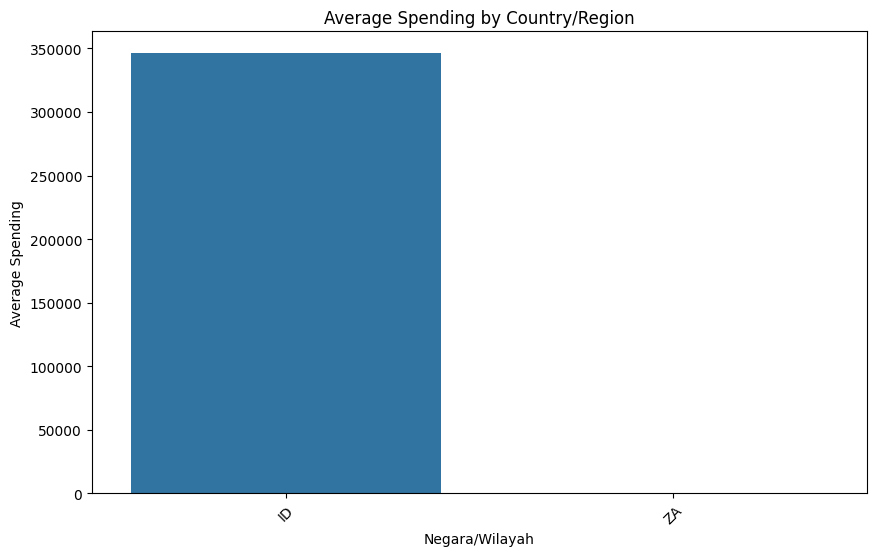

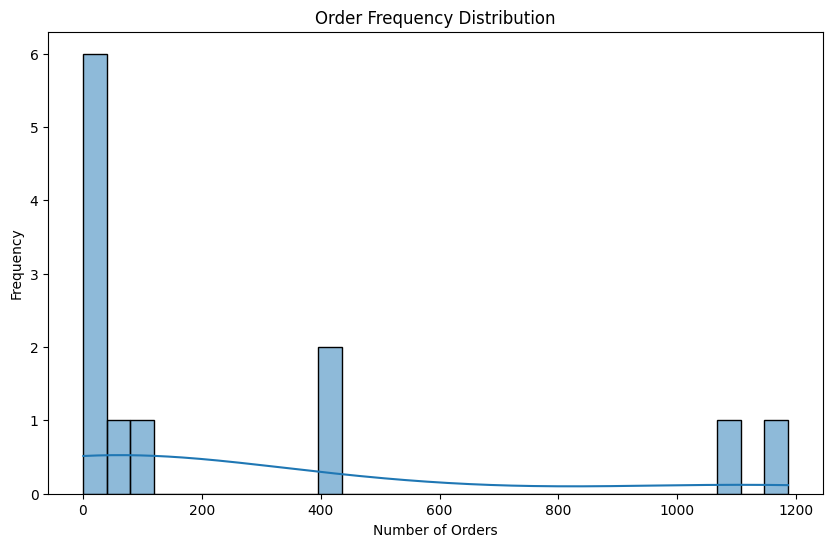

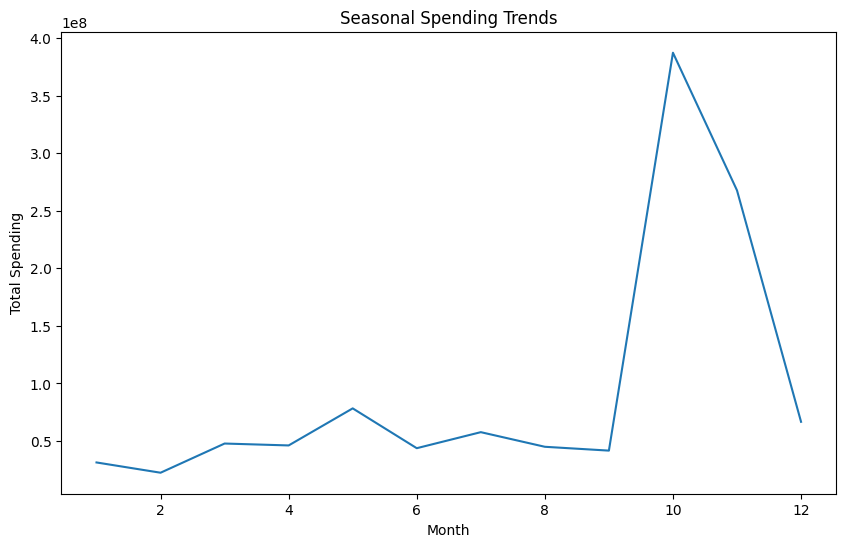

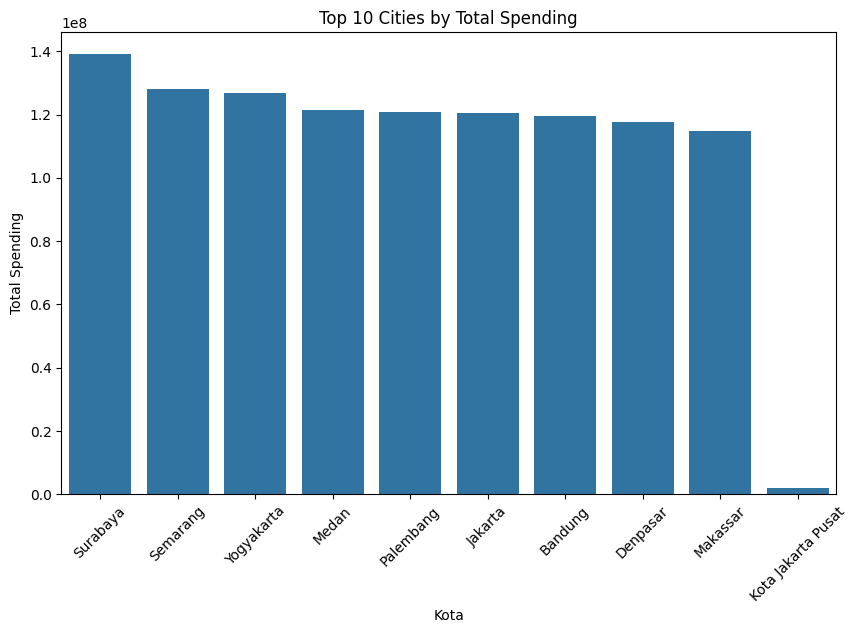

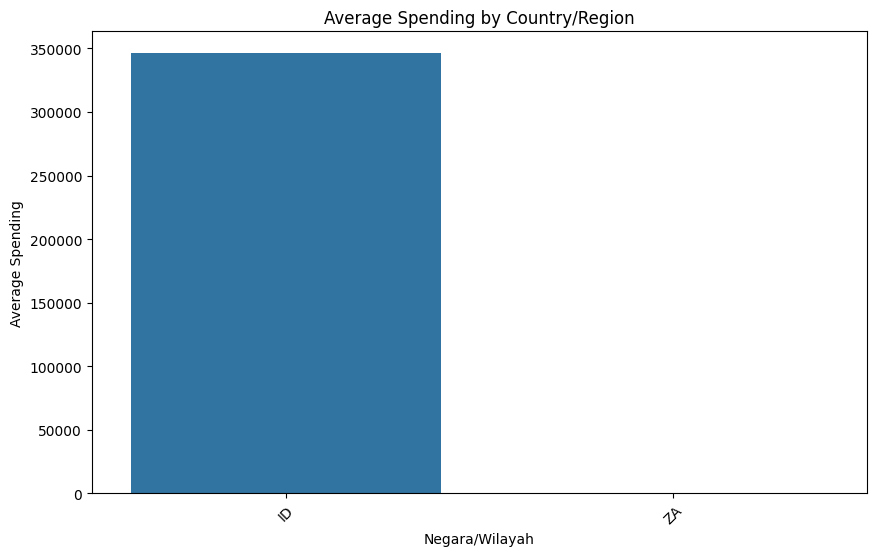

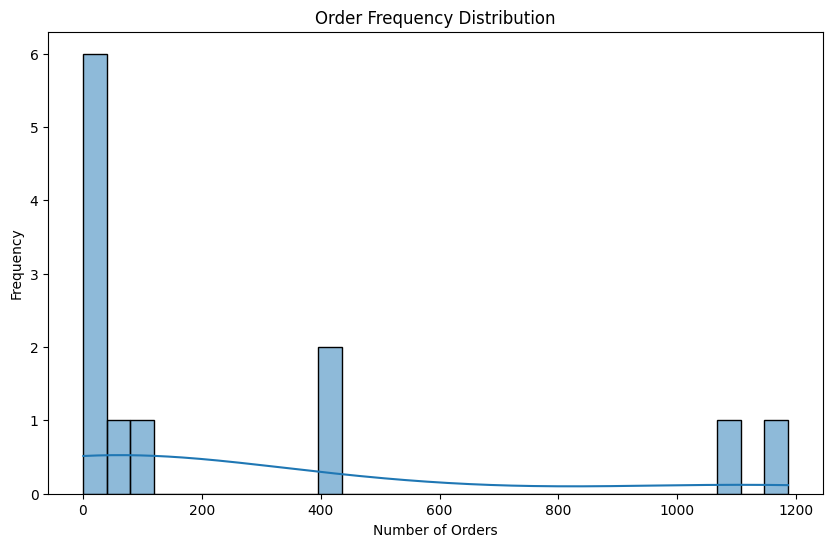

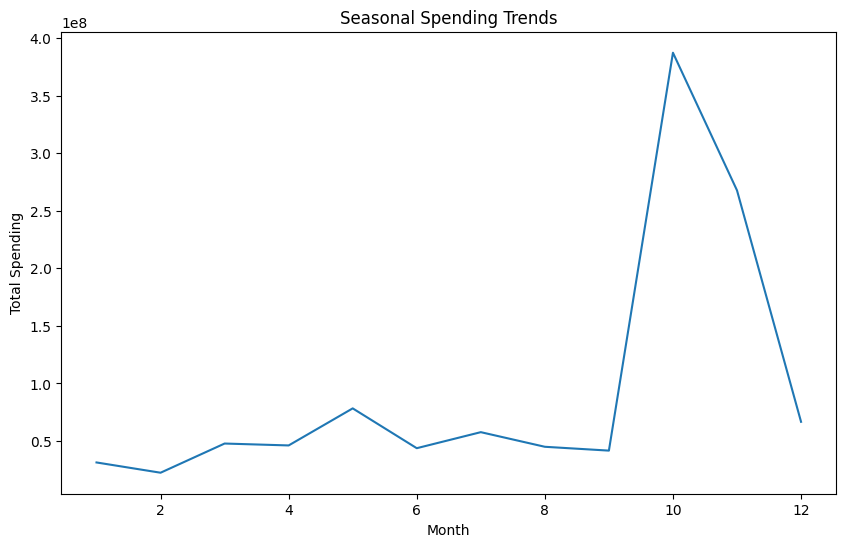

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Updated_Customer_Report_With_Abbreviations.csv')

# Display the first few rows of the DataFrame
print(df.head())

# 1. Data Cleaning
df.columns = df.columns.str.strip()
df['Terakhir Aktif'] = pd.to_datetime(df['Terakhir Aktif'])
df['Mendaftar'] = pd.to_datetime(df['Mendaftar'])

# 2. Customer Segmentation using RFM Analysis
def rfm_analysis(df):
    rfm = df.groupby('Nama pengguna').agg({
        'Terakhir Aktif': lambda x: (df['Terakhir Aktif'].max() - x.max()).days,
        'Pesanan': 'count',
        'Total Pengeluaran': 'sum'
    }).rename(columns={
        'Terakhir Aktif': 'Recency',
        'Pesanan': 'Frequency',
        'Total Pengeluaran': 'MonetaryValue'
    })

    # Segment customers using pd.qcut with duplicates='drop'
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=False, duplicates='drop')
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=False, duplicates='drop')
    rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], 4, labels=False, duplicates='drop')

    rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
    
    return rfm

rfm = rfm_analysis(df)

# 3. Top Cities Analysis
def top_cities_analysis(df):
    top_cities = df.groupby('Kota')['Total Pengeluaran'].sum().nlargest(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_cities.index, y=top_cities.values)
    plt.title('Top 10 Cities by Total Spending')
    plt.ylabel('Total Spending')
    plt.xticks(rotation=45)
    plt.show()

top_cities_analysis(df)

# 4. Spending Patterns Analysis
def spending_patterns_analysis(df):
    spending_by_age = df.groupby('Negara/Wilayah')['Total Pengeluaran'].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=spending_by_age.index, y=spending_by_age.values)
    plt.title('Average Spending by Country/Region')
    plt.ylabel('Average Spending')
    plt.xticks(rotation=45)
    plt.show()

spending_patterns_analysis(df)

# 5. Behavioral Trends Analysis
def behavioral_trends_analysis(df):
    frequency_analysis = df['Pesanan'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.histplot(frequency_analysis, bins=30, kde=True)
    plt.title('Order Frequency Distribution')
    plt.xlabel('Number of Orders')
    plt.ylabel('Frequency')
    plt.show()

behavioral_trends_analysis(df)

# 6. Seasonal Promotions Analysis
def seasonal_promotions_analysis(df):
    df['Month'] = df['Mendaftar'].dt.month
    seasonal_trends = df.groupby('Month')['Total Pengeluaran'].sum()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=seasonal_trends.index, y=seasonal_trends.values)
    plt.title('Seasonal Spending Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Spending')
    plt.show()

seasonal_promotions_analysis(df)

# 7. Churn Prediction (Pseudocode)
def churn_prediction(df):
    # Use logistic regression or machine learning models to predict churn
    pass

# Run the analyses
rfm = rfm_analysis(df)
top_cities_analysis(df)
spending_patterns_analysis(df)
behavioral_trends_analysis(df)
seasonal_promotions_analysis(df)


Baik, saya akan menjelaskan rinci mengenai output dan visualisasi yang disediakan.

1. **Top 10 Cities by Total Spending**
   - Grafik ini menunjukkan 10 kota dengan total pengeluaran tertinggi dari data yang diberikan.
   - Kota dengan total pengeluaran tertinggi adalah Surabaya, diikuti oleh Semarang, Yogyakarta, dan lainnya.
   - Grafik ini dapat membantu mengidentifikasi pasar-pasar utama dengan potensi penjualan yang tinggi, yang dapat menjadi fokus strategi pemasaran dan pengembangan bisnis.

2. **Average Spending by Country/Region**
   - Grafik ini menampilkan rata-rata pengeluaran per negara/wilayah.
   - Berdasarkan grafik, negara/wilayah dengan rata-rata pengeluaran tertinggi adalah ID (Indonesia), dengan nilai rata-rata pengeluaran sekitar 300.000.
   - Informasi ini dapat membantu mengidentifikasi pasar-pasar yang memiliki potensi tinggi untuk pengembangan bisnis dan strategi penetapan harga yang sesuai.

3. **Order Frequency Distribution**
   - Grafik ini menunjukkan distribusi frekuensi pesanan dari pelanggan.
   - Grafik menunjukkan bahwa sebagian besar pelanggan memiliki jumlah pesanan di bawah 200, dengan frekuensi tertinggi di sekitar 400-600 pesanan.
   - Informasi ini dapat membantu mengidentifikasi pola pembelian pelanggan dan memahami segmentasi pelanggan berdasarkan frekuensi pemesanan.

4. **Seasonal Spending Trends**
   - Grafik ini menampilkan tren pengeluaran pelanggan berdasarkan bulan.
   - Grafik menunjukkan adanya pola musiman dalam pengeluaran, dengan puncak tertinggi di bulan tertentu.
   - Informasi ini dapat membantu perusahaan merencanakan strategi promosi dan penawaran khusus di bulan-bulan dengan tingkat pengeluaran yang lebih tinggi.

Secara keseluruhan, output dan visualisasi yang disediakan memberikan wawasan yang berharga tentang perilaku pelanggan, pola pengeluaran, dan potensi pasar. Informasi ini dapat digunakan untuk mengembangkan strategi pemasaran, penetapan harga, dan pengembangan produk yang lebih efektif.